Regression Analysis:(Any one) 
A. Predict the price of the Uber ride from a given pickup point to the agreed drop-off
location. Perform following tasks: 
                 1. Pre-process the dataset. 
                 2. Identify outliers.
                 3. Check the correlation. 
                4. Implement linear regression and ridge, Lasso regression models. 
                5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link:       https://www.kaggle.com/datasets/yasserh/uber-fares-dataset 

In [174]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [175]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [176]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [178]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [179]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [180]:
p

NameError: name 'p' is not defined

In [181]:
df[df['fare_amount'].values <= 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
20744,0.00,2015-04-22 23:25:07 UTC,-73.658897,40.805199,-73.658897,40.805199,1
22182,0.00,2010-03-20 02:59:51 UTC,-73.994366,40.755395,-73.998718,40.854853,2
63395,-5.00,2015-03-03 23:07:41 UTC,-73.992249,40.748936,-73.988518,40.748180,1
71246,-3.30,2010-02-11 21:47:10 UTC,-73.952725,40.768235,-73.949928,40.772208,2
79903,-3.50,2015-05-01 14:43:02 UTC,-73.982430,40.775024,-73.981750,40.778439,1
87467,0.00,2015-01-04 03:51:13 UTC,-73.969475,40.807503,0.000000,0.000000,2
89322,-49.57,2010-03-09 08:26:10 UTC,-73.972772,40.785657,-73.972867,40.785500,5
92063,-23.70,2010-03-12 08:49:10 UTC,-73.952740,40.768233,-74.007028,40.707338,3
98875,-52.00,2015-03-20 21:31:14 UTC,-74.000359,40.728729,-74.005699,40.728680,5
104080,-7.30,2010-03-09 20:25:10 UTC,-73.952623,40.766942,-73.953787,40.784882,1


In [182]:
df.drop(df[df['fare_amount'].values <= 0].index  , inplace= True   )

In [183]:
df[df['fare_amount'].values <= 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


<Axes: >

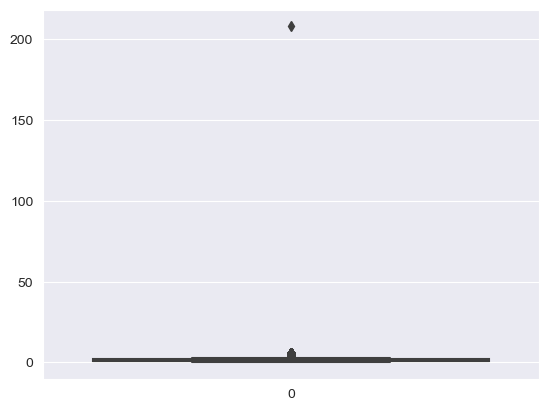

In [184]:
sns.boxplot(df['passenger_count']) 

In [185]:
df[df['passenger_count'] >6] 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [186]:
df.drop(df[df['passenger_count'] >6].index, inplace=True)

In [187]:
df[df['passenger_count'] >6] 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


<Axes: >

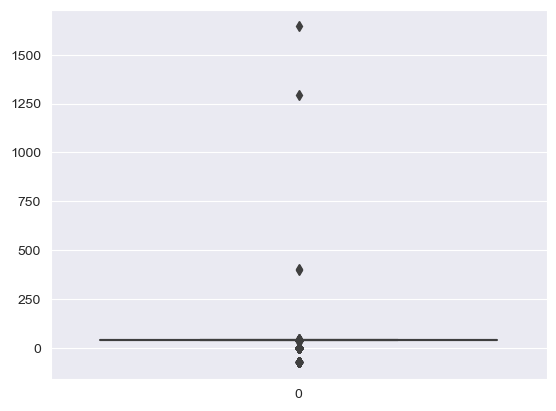

In [188]:
sns.boxplot(df['pickup_latitude']) 

In [189]:
df.sample()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
42051,12.5,2012-11-27 23:47:00 UTC,-73.987467,40.729282,-73.984002,40.764402,5


In [190]:
def filter_latitude(val):
    if val < -90 or val > 90:
        return np.nan
    else:
        return val

def filter_longitude(val):
    if val < -180 or val > 180:
        return np.nan
    else:
        return val

In [191]:
df['pickup_longitude'] = df['pickup_longitude'].apply(filter_longitude)
df['pickup_latitude'] = df['pickup_latitude'].apply(filter_latitude)
df['dropoff_longitude'] = df['dropoff_longitude'].apply(filter_longitude)
df['dropoff_latitude'] = df['dropoff_latitude'].apply(filter_latitude)

In [192]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     7
pickup_latitude      4
dropoff_longitude    4
dropoff_latitude     4
passenger_count      0
dtype: int64

In [193]:
df.dropna(inplace=True)

In [194]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<Axes: >

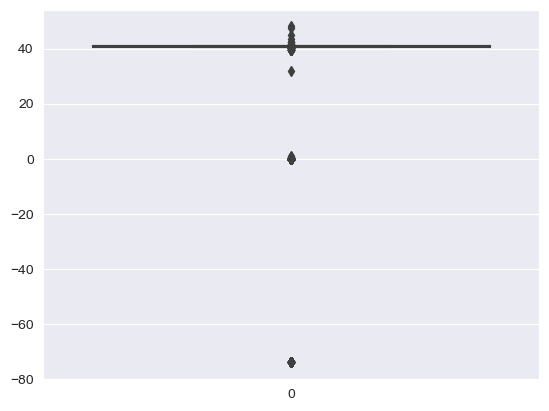

In [195]:
sns.boxplot(df['pickup_latitude']) 

In [196]:
!pip install geopy

In [197]:
# calculate the distance between pickup and dropoff using geopy library
from geopy.distance import great_circle

def distance_km(x):
    pickup = (x['pickup_latitude'], x['pickup_longitude'])
    dropoff = (x['dropoff_latitude'], x['dropoff_longitude'])
    return great_circle(pickup, dropoff).km

In [198]:
df['distance_km'] = df.apply(lambda x: distance_km(x), axis=1)

In [199]:
df.drop(['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'] , inplace=True , axis= 1)

In [200]:
df.describe()

,fare_amount,passenger_count,distance_km
count,199964.000000,199964.000000,199964.000000
mean,11.362542,1.683458,20.475791
std,9.897195,1.306932,378.657163
min,0.010000,0.000000,0.000000
25%,6.000000,1.000000,1.215337
50%,8.500000,1.000000,2.120977
75%,12.500000,2.000000,3.874819
max,499.000000,6.000000,8782.911013


In [201]:
# df[df['distance_km']==0]
df

,fare_amount,pickup_datetime,passenger_count,distance_km
0,7.5,2015-05-07 19:52:06 UTC,1,1.683325
1,7.7,2009-07-17 20:04:56 UTC,1,2.457593
2,12.9,2009-08-24 21:45:00 UTC,1,5.036384
3,5.3,2009-06-26 08:22:21 UTC,3,1.661686
4,16.0,2014-08-28 17:47:00 UTC,5,4.475456
...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,1,0.112210
199996,7.5,2014-03-14 01:09:00 UTC,1,1.875053
199997,30.9,2009-06-29 00:42:00 UTC,2,12.850337
199998,14.5,2015-05-20 14:56:25 UTC,1,3.539720


In [202]:
df.drop(df[df['distance_km']==0].index , inplace= True )

<Axes: >

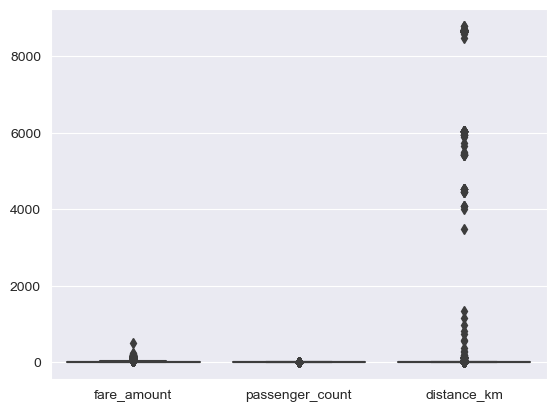

In [203]:
sns.boxplot(df)

In [204]:
## handileng the outliers with pandas
q1 = df['distance_km'].quantile(0.25)
q3 = df['distance_km'].quantile(0.75)
iqr = q3 - q1
lower =  q1 - 1.5 * iqr
upper = q3 + 1.5 *iqr

In [205]:
df_clean0 = df[(df['distance_km'] >= lower) & (df['distance_km']<=upper) ]

In [206]:
df_clean0.describe()

,fare_amount,passenger_count,distance_km
count,177961.000000,177961.000000,177961.000000
mean,9.240175,1.682026,2.483259
std,5.466532,1.306509,1.688242
min,0.010000,0.000000,0.000084
25%,5.700000,1.000000,1.217376
50%,8.000000,1.000000,2.005922
75%,11.300000,2.000000,3.318405
max,499.000000,6.000000,7.976771


In [207]:
df_clean0.drop(df_clean0[df_clean0['distance_km'] < 1].index, inplace=True)

In [208]:
## handileng the outliers with pandas
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
iqr = q3 - q1
lower =  q1 - 1.5 * iqr
upper = q3 + 1.5 *iqr

In [209]:
df_clean = df_clean0[(df_clean0['fare_amount'] >= lower) & (df_clean0['fare_amount']<=upper) ]

In [210]:
df_clean.duplicated().sum()

0

In [211]:
df_clean.shape

(144584, 4)

<Axes: >

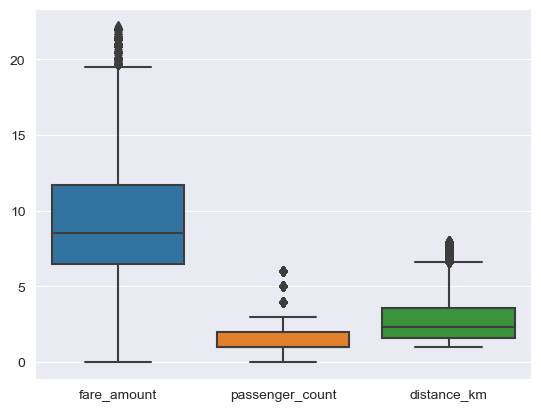

In [212]:
sns.boxplot(df_clean)

In [213]:
# convert the col pickup_datetime type to date and split it to Year and Month 
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'] ) 

In [214]:
# get the day, weekday, month, year, hour from pickup_datetime
df_clean['day'] = df_clean['pickup_datetime'].dt.day_name()
df_clean['weekday'] = df_clean['pickup_datetime'].dt.weekday
df_clean['month'] = df_clean['pickup_datetime'].dt.month_name()
df_clean['year'] = df_clean['pickup_datetime'].dt.year
df_clean['hour'] = df_clean['pickup_datetime'].dt.hour

# drop pickup_datetime
df_clean.drop('pickup_datetime', axis=1, inplace=True) 

In [215]:
df_clean.head()

,fare_amount,passenger_count,distance_km,day,weekday,month,year,hour
0,7.5,1,1.683325,Thursday,3,May,2015,19
1,7.7,1,2.457593,Friday,4,July,2009,20
2,12.9,1,5.036384,Monday,0,August,2009,21
3,5.3,3,1.661686,Friday,4,June,2009,8
4,16.0,5,4.475456,Thursday,3,August,2014,17


In [216]:
#df_clean['year'].value_counts()

In [218]:
#df_clean.describe()

<Axes: >

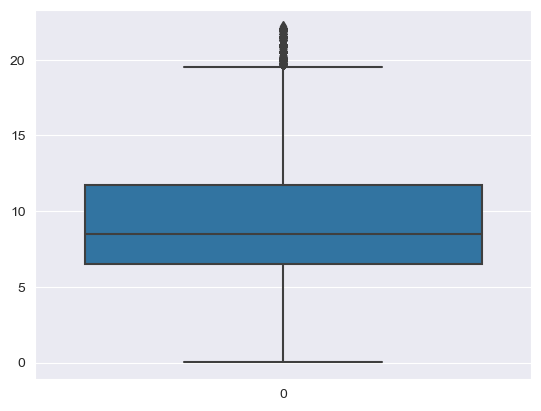

In [219]:
sns.boxplot(df_clean['fare_amount'])

In [220]:
df_clean.drop(df_clean[df_clean['fare_amount'] > 200].index, inplace=True)
df_clean.drop(df_clean[df_clean['fare_amount'] < 1].index, inplace=True)

In [221]:
df_clean.describe()

,fare_amount,passenger_count,distance_km,weekday,year,hour
count,144583.000000,144583.000000,144583.000000,144583.000000,144583.000000,144583.000000
mean,9.577385,1.684832,2.784359,3.063728,2011.715693,13.583934
std,3.837879,1.307017,1.551354,1.947416,1.851542,6.555946
min,2.500000,0.000000,1.000037,0.000000,2009.000000,0.000000
25%,6.500000,1.000000,1.578032,1.000000,2010.000000,9.000000
50%,8.500000,1.000000,2.316199,3.000000,2012.000000,14.000000
75%,11.700000,2.000000,3.584194,5.000000,2013.000000,19.000000
max,22.200000,6.000000,7.976727,6.000000,2015.000000,23.000000


In [222]:
df_clean.describe(include='O')

,day,month
count,144583,144583
unique,7,12
top,Saturday,May
freq,22485,13645


In [223]:
# converting day and months in numeric 
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}


df_clean['day'] = df_clean['day'].map(day_mapping)
df_clean['month'] = df_clean['month'].map(month_mapping)

In [224]:
df_clean.head()

,fare_amount,passenger_count,distance_km,day,weekday,month,year,hour
0,7.5,1,1.683325,4,3,5,2015,19
1,7.7,1,2.457593,5,4,7,2009,20
2,12.9,1,5.036384,1,0,8,2009,21
3,5.3,3,1.661686,5,4,6,2009,8
4,16.0,5,4.475456,4,3,8,2014,17


<Axes: >

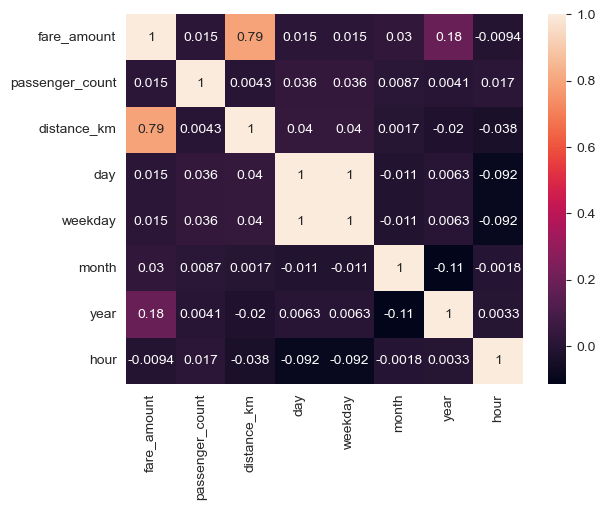

In [225]:
matrix = df_clean.corr()
sns.heatmap(df_clean.corr(),annot=True)

In [226]:
x = df_clean.drop('fare_amount', axis=1)
y = df_clean['fare_amount']

In [227]:
x.head()

,passenger_count,distance_km,day,weekday,month,year,hour
0,1,1.683325,4,3,5,2015,19
1,1,2.457593,5,4,7,2009,20
2,1,5.036384,1,0,8,2009,21
3,3,1.661686,5,4,6,2009,8
4,5,4.475456,4,3,8,2014,17


In [232]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [233]:
x_train = preprocessing.fit_transform(x_train)
x_test = preprocessing.transform(x_test)

In [234]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(x_test)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 2.1796412672771415
R2: 0.6742779948479607


In [235]:
from sklearn.linear_model import Ridge 
r = Ridge()
r = r.fit(x_train , y_train)

y_pred_ridge = r.predict(x_test) 
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('R2:', r2_score(y_test, y_pred_ridge))

RMSE: 2.179641448955581
R2: 0.6742779405485044


In [236]:
from sklearn.linear_model import Lasso
r = Lasso()
r = r.fit(x_train , y_train)

y_pred_lasso = r.predict(x_test) 
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lasso))) 
print('R2:', r2_score(y_test, y_pred_lasso)) #Measures the proportion of the variance in the dependent variable explained by the model.

RMSE: 2.6592463412324223
R2: 0.5151647399296657


The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. As we can see in the above table Linear Regression has the lowest value of RMSE, So it is considered most suitable

In [2]:
# linear regression - Linear regression is a straightforward method for modeling the relationship between a dependent variable (target) and one or more independent variables (features or predictors).
# Ridge Regreesion - Ridge regression is an extension of linear regression that adds an L2 regularization term to the linear regression's cost function.L2 regularization (also known as Ridge regularization) adds a penalty term that encourages the magnitude of the coefficients to be small. This helps to prevent overfitting by reducing the influence of individual features.Ridge regression is particularly useful when multicollinearity (high correlation between features) is a concern, as it tends to keep all features in the model while reducing their weights.
# Lasso regression - Lasso (Least Absolute Shrinkage and Selection Operator) is another extension of linear regression, but it uses L1 regularization.L1 regularization encourages the sparsity of the coefficients by adding a penalty term that forces some of the feature weights to be exactly zero. As a result, Lasso can perform feature selection by effectively excluding some features from the model.Lasso is particularly useful when there are many features, and you want to identify and retain the most important ones.

# key difference - Ridge adds a penalty term proportional to the square of the coefficients (L2), while Lasso adds a penalty term proportional to the absolute value of the coefficients (L1).Ridge tends to shrink all coefficient values towards zero but doesn't make them exactly zero, while Lasso can set some coefficients to zero, effectively excluding features.